<img src='../images/course_logo_2024.jpg'/>

<div dir="rtl">
    <h1 style="text-align: center;"> תירגול 1 התנסות עם למידת מכונה וחזרה על פייתון</h1>
    <h1 style="text-align: center;"> Ex 1 Hands on ML and python refresher</h1>
</div>

[fast.ai YouTube Course](https://www.youtube.com/watch?v=8SF_h3xF3cE&list=PLfYUBJiXbdtSvpQjSnJJ_PmDQB_VyT5iU)<br/>
[fast.ai Website](https://www.fast.ai/) <br/>
[fast.ai Course repository](https://github.com/fastai/course22) <br/>
[fast.ai Book repostory](https://github.com/fastai/fastbook)


# Exercise outline
1. Quick getting started with Google Colab
2. Quick Example for Machine Learning
3. Jupyter Notebooks and markdown
4. Python and Numpy refershers

# 1. Quick getting started with Google Colab

* Interactive computing environment
* Creating sharing documents with live code, equations, graphs, and rich text
* Very popular among academia and in data science communities
* Distinctive feature run code cell-by-cell insted of running the whole script
* Cells can be either rich text or python (or other languages such as R)
* Usefull for wiritng lessons and also text-books and even articles
* Building simple simualtions
* For students it is an interactive platform to experiment with almost no setup
* Notebooks can later on be published and showcased

## Main Features

* Itnerative cells
* Table of contents
* Export to python
* Ability to share the results

We will be using either Google colab ro Jupyter notebook, Google colab requiers **No Setup** and I will be sharing the exercise notebooks via Github

https://colab.research.google.com

# 2. Quick Example

1. Bird or Not
2. Calculate the parameters of polynomial

## 2.1 Bird or Not?

Based on [Jeremy Howard course Lesson 01](https://github.com/fastai/course22)


In 2015 the idea of creating a computer system that could recognise birds was considered so outrageously challenging that it was the basis of [this XKCD joke](https://xkcd.com/1425/):

![image.png](https://raw.githubusercontent.com/Shai2u/gis_ml_workshop_2024/main/images/joke.png)

But today, we can do exactly that, in just a few minutes, using entirely free resources!

The basic steps we'll take are:

1. Use images of "bird photos" and "forest photos"
1. Fine-tune a pretrained neural network to recognise these two groups
1. Try running this model on a picture of a bird and see if it works.

## Step 1: Download images of birds and non-birds

In [ ]:
import requests # To download stuff
import shutil # To extract zip


In [ ]:

zip_url = 'https://github.com/Shai2u/gis_ml_workshop_2024/raw/main/examples/bird_or_not/bird_or_not.zip'
# Download the ZIP file
response = requests.get(zip_url, stream=True)

In [57]:
try:
    import google.colab
    in_colab = True
except ImportError:
    in_colab = False # change to True if you are using in colab


In [ ]:
local_zip_path = '/content/bird_or_not.zip' if colab else 'bird_or_not.zip'
   
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content to a local file
    with open(local_zip_path,'wb') as output_file:
      output_file.write(response.content)

In [ ]:
local_extracted_path = '/content/bird_or_not' if in_colab else 'bird_or_not'
shutil.unpack_archive(local_zip_path, local_extracted_path, format='zip')


...and then take a look at it:

In [ ]:
import os
import numpy as np
from fastai.vision.all import Image

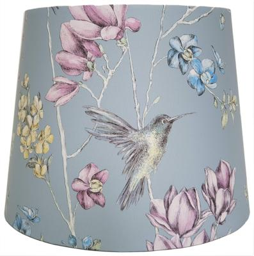

In [ ]:
path = os.path.join('/content/bird_or_not/bird' if in_colab else 'bird_or_not/bird')
bird_listing_path = os.listdir(path)

dest = os.path.join(path, bird_listing_path[np.random.randint(0, len(bird_listing_path))])

im = Image.open(dest)
im.to_thumb(256,256)

Now let's do the same with "forest photos":

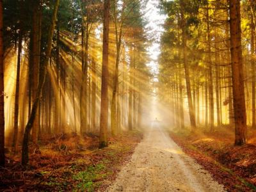

In [ ]:
path = os.path.join('/content/bird_or_not/forest' if in_colab else 'bird_or_not/forest')
forest_listing_path = os.listdir(path)

dest = os.path.join(path, forest_listing_path[np.random.randint(0, len(forest_listing_path))])

im = Image.open(dest)
im.to_thumb(256,256)

Our searches seem to be giving reasonable results, so let's grab 200 examples of each of "bird" and "forest" photos, and save each group of photos to a different folder:

## Step 2: Train our model

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

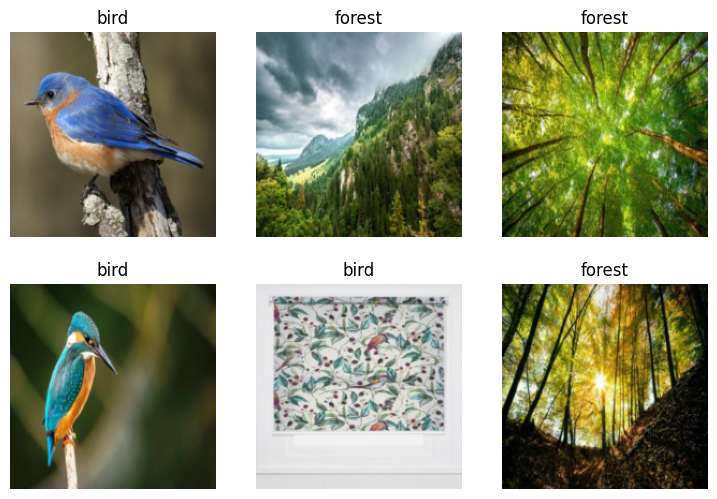

In [ ]:
from fastcore.all import Path
from fastai.vision.all import DataBlock
from fastai.vision.all import ImageBlock # Input of our model is Images
from fastai.vision.all import CategoryBlock # Outputs are categories (in this case, "bird" or "forest")
from fastai.vision.all import get_image_files # To find all the inputs to our model, run the `get_image_files` function (which returns a list of all image files in a path).
from fastai.vision.all import RandomSplitter # Split the data into training and validation sets randomly
from fastai.vision.all import parent_label # The labels (`y` values) is the name of the `parent` of each file (i.e. the name of the folder they're in, which will be *bird* or *forest*).
from fastai.vision.all import Resize # Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).

#searches = 'forest','bird'
path = Path('/content/bird_or_not' if in_colab else 'bird_or_not')

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

Now we're ready to train our model. The fastest widely used computer vision model is `resnet18`. You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)

`fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

In [ ]:
from fastai.vision.all import vision_learner # Method that prepares the Datablocks before training them
from fastai.vision.all import resnet18 # The fastest widely used computer vision model
from fastai.vision.all import error_rate # Metric that is used to messure our error

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3) # Number of epochs (Runs) each run tries to perfom small iterative corrections and test to see if the error rate goes down

epoch,train_loss,valid_loss,error_rate,time
0,0.855246,0.356481,0.112245,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.086835,0.013712,0.010204,00:03
1,0.049824,0.003987,0.000000,00:03
2,0.034335,0.003929,0.000000,00:03


Generally when I run this I see 100% accuracy on the validation set (although it might vary a bit from run to run).

"Fine-tuning" a model means that we're starting with a model someone else has trained using some other dataset (called the *pretrained model*), and adjusting the weights a little bit so that the model learns to recognise your particular dataset. In this case, the pretrained model was trained to recognise photos in *imagenet*, and widely-used computer vision dataset with images covering 1000 categories) For details on fine-tuning and why it's important, check out the [free fast.ai course](https://course.fast.ai/).

## Step 3: Use our model (and build your own!)

Let's see what our model thinks about that bird we randomly downloaded from google:

In [ ]:
from fastai.vision.all import PILImage


In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000


## 2.1 Fitting a polynomial function with *gradient descent*

Based on [Jeremy Howard course Lesson 04](https://github.com/fastai/course22)

and some help from here:
https://medium.com/@chex2chex/andrew-ngs-linear-regression-exercise-a-python-solution-b2568347d2af

In [59]:
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
from fastai.basics import plt # based on maptloblib
from fastai.basics import torch # pytorch
from fastai.basics import partial
import numpy as np

try:
    import google.colab
    in_colab = True
except ImportError:
    in_colab = False
    
plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)
    plt.show()

To learn how gradient descent works, we're going to start by fitting a quadratic, since that's a function most of us are probably more familiar with than a neural network. Here's the quadratic we're going to try to fit:

In [60]:
def quad(a, b, c, x): 
    return a*x**2 + b*x + c

#if we fix some particular values of a, b, and c, then we'll have made a quadratic. To fix values passed to a function in python, we use the partial function, like so:

def mk_quad(a,b,c): 
    return partial(quad, a,b,c)

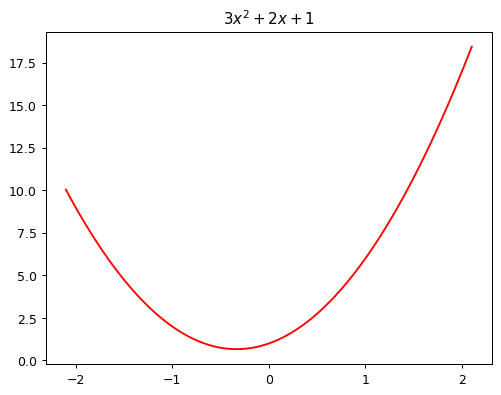

In [61]:
f = mk_quad(3,2,1)
plot_function(f,  "$3x^2 + 2x + 1$")

This quadratic is of the form $ax^2+bx+c$, with parameters $a=3$, $b=2$, $c=1$. To make it easier to try out different quadratics for fitting a model to the data we'll create, let's create a function that calculates the value of a point on any quadratic:

Now let's simulate making some noisy measurements of our quadratic `f`. We'll then use gradient descent to see if we can recreate the original function from the data.

In [62]:
def noise(x, scale): 
    return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): 
    return x * (1+noise(x,mult)) + noise(x,add)
    
np.random.seed(42)

x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.15, 1.5)

Here's the first few values of each of `x` and `y`:

In [63]:
x[:5],y[:5]

(tensor([[-2.0000],
         [-1.7895],
         [-1.5789],
         [-1.3684],
         [-1.1579]]),
 tensor([[11.8690],
         [ 6.5433],
         [ 5.9396],
         [ 2.6304],
         [ 1.7947]], dtype=torch.float64))

A tensor is just like an `array` in numpy (if you're not familiar with numpy, I strongly recommend reading [this great book](https://wesmckinney.com/book/), because it's a critical foundation for nearly all numeric programming in Python. 

We will be talking later on this course - what is Tensors, for now we will jusst say A tensor can be a single number (a *scalar* or *rank-0 tensor*), a list of numbers (a *vector* or *rank-1 tensor*), a table of numbers (a *matrix* or *rank-0 tensor*), a table of tables of numbers (a *rank-3 tensor*), and so forth.

We're not going to learn much about our data by just looking at the raw numbers, so let's draw a picture:

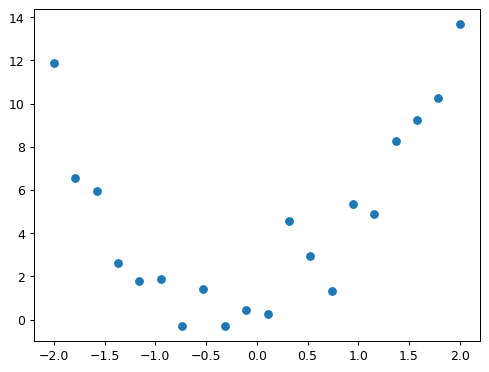

In [64]:
plt.scatter(x,y);

How do we find values of a, b, and c which fit this data? One approach is to try a few values and see what fits. Here's a function which overlays a quadratic on top of our data, along with some sliders to change a, b, and c, and see how it looks:

In [65]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c), ylim=(-3,13))

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

Try moving slider `a` a bit to the left. Does that look better or worse? How about if you move it a bit to the right? Find out which direction seems to improve the fit of the quadratic to the data, and move the slider a bit in that direction. Next, do the same for slider `b`: first figure out which direction improves the fit, then move it a bit in that direction. Then do the same for `c`.

OK, now go back to slider `a` and repeat the process. Do it again for `b` and `c` as well.

Did you notice that by going back and doing the sliders a second time that you were able to improve things a bit further? That's an important insight -- it's only after changing `b` and `c`, for instance, that you realise that `a` actually needs some adjustment based on those new values.

One thing that's making this tricky is that we don't really have a great sense of whether our fit is really better or worse. It would be easier if we had a numeric measure of that. On easy metric we could use is *mean absolute error* -- which is the distance from each data point to the curve:

In [66]:
# Mean absolute errror
def mae(preds, acts): 
    return (torch.abs(preds-acts)).mean()

We'll update our interactive function to print this at the top for us.

Use this to repeat the approach we took before to try to find the best fit, but this time just use the value of the metric to decide which direction to move each slider, and how far to move it.

This time around, try doing it in the opposite order: `c`, then `b`, then `a`.

You'll probably find that you have to go through the set of sliders a couple of times to get the best fit.

In [67]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In a modern neural network we'll often have tens of millions of parameters to fit, or more, and thousands or millions of data points to fit them to. We're not going to be able to do that by moving sliders around! We'll need to automate this process.

Thankfully, that turns out to be pretty straightforward. We can use calculus to figure out, for each parameter, whether we should increase or decrease it.

## Finding the parameters using gradient descent

The basic idea is this: if we know the *gradient* of our `mae()` function *with respect to* our parameters, `a`, `b`, and `c`, then that means we know how adjusting (for instance) `a` will change the value of `mae()`. If, say, `a` has a *negative* gradient, then we know that increasing `a` will decrease `mae()`. Then we know that's what we need to do, since we trying to make `mae()` as low as possible.

So, we find the gradient of `mae()` for each of our parameters, and then adjust our parameters a bit in the *opposite* direction to the sign of the gradient.

To do this, first we need a function that takes all the parameters `a`, `b`, and `c` as a single vector input, and returns the value `mae()` based on those parameters:

In [68]:
def build_slider(label, value):
    return widgets.FloatSlider(
        value=value,
        min=0,
        max=3,
        step=0.1,
        description=label,
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='.1f',
        )

In [69]:
out = widgets.Output(layout={'border': '1px solid black'})
out

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

In [70]:
out_derivative = widgets.Output(layout={'border': '1px solid black'})
out_derivative

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

Let's try it:

In [71]:
def f(x): 
    return 3*x**2 + 2*x + 1
    
def noise(x, scale): 
    return np.random.normal(scale=scale, size=x.shape)
    
def add_noise(x, mult, add): 
    return x * (1+noise(x,mult)) + noise(x,add)
    
np.random.seed(42)

x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.15, 1.5)

In [72]:
abc = torch.tensor([0.1,0.1,0.1])

In [73]:
def quad(a, b, c, x): 
    return a*x**2 + b*x + c

def mk_quad(a,b,c): 
    return partial(quad, a,b,c)
    
def mae(preds, acts): 
    return (torch.abs(preds-acts)).mean()

def quad_mae(params):
    f = mk_quad(*params)
    return mae(f(x), y)

In [74]:
# @interact(a=abc[0].item(), b=abc[1].item(), c=abc[2].item())
def plot_quad(a, b, c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    if in_colab:
        w_a =build_slider('a', abc[0].item())
        w_b =build_slider('b', abc[1].item())
        w_c = build_slider('c', abc[2].item())
        display(w_a)
        display(w_b)
        display(w_c)
        plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f} ${round(w_a.value,1)}x^2 + {round(w_b.value,1)}x + {round(w_c.value,1)}$")
    else:
        with out:
            out.clear_output()
            w_a =build_slider('a', abc[0].item())
            w_b =build_slider('b', abc[1].item())
            w_c = build_slider('c', abc[2].item())
            display(w_a)
            display(w_b)
            display(w_c)
            plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f} ${round(w_a.value,1)}x^2 + {round(w_b.value,1)}x + {round(w_c.value,1)}$")

In [75]:
# plot the loss and the step
def plot_losss(loss_list, title):
    x_liss = range(0,len(loss_list))
    plt.xlim(0, 35)
    plt.ylim(0, 10)
    plt.plot(x_liss, loss_list)
    # Add labels and title to the plot
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.title(title)  
    # Show the plot
    plt.show()

In [76]:
abc.requires_grad_()
i = 0
loss_list = []

In [77]:

loss = quad_mae(abc)
loss.backward()
with torch.no_grad(): 
    der = abc.grad

    abc -= der * 0.01
if in_colab:
    out_derivative.clear_output()
    loss_list.append(loss.item())
    title = f'step={i}; loss={loss:.2f} \n derivative: {[np.round(i, 2)for i in (der.detach().numpy())]}'
    plot_losss(loss_list, title)
else:
    with out_derivative:
        out_derivative.clear_output()
        loss_list.append(loss.item())
        title = f'step={i}; loss={loss:.2f} \n derivative: {[np.round(i, 2)for i in (der.detach().numpy())]}'
        plot_losss(loss_list, title)
i+=1
plot_quad(abc[0].item(), abc[1].item(), abc[2].item())


# 3. Python and Numpy Refreshers

https://numpy.org/doc/stable/user/quickstart.html

In [78]:
import numpy as np # import library

In [79]:
a = np.array([[1, 2], [3, 4]]) # define an array with dimention of (n>1)

In [80]:
print(a)

[[1 2]
 [3 4]]


In [81]:
print(a.shape)

(2, 2)


In [82]:
print(a.ndim)

2


In [83]:
a = np.array([1, 2, 3, 4]) # 1-D array
b = np.array([[1, 2, 3, 4]]) # row vector as a 2-D array
c = np.array([[1], [2], [3], [4]]) # column vector as a 2-D array
print (a.shape, b.shape, c.shape)

(4,) (1, 4) (4, 1)


In [84]:
print(a)
print(b)
print(c)

[1 2 3 4]
[[1 2 3 4]]
[[1]
 [2]
 [3]
 [4]]


In [85]:
print(a.ndim)
print(b.ndim)
print(c.ndim)

1
2
2


In [86]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [87]:
# Create sequence of numbers
np.arange(10, 30, 5)

array([10, 15, 20, 25])

In [88]:
# Rearrange
np.arange(15).reshape(3, 5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [89]:
np.linspace(0, 2, 9) # 9 numbers from 0 to 2

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

### Basic Operations

In [103]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)
print(b)

[0 1 2 3]


In [104]:

c = a - b
c


array([20, 29, 38, 47])

In [105]:
print(b, "--> x^2")
b**2


[0 1 2 3] --> x^2


array([0, 1, 4, 9])

In [115]:
print(a)
10 * np.sin(a)


[1000   30 1000   50]


array([ 8.26879541, -9.88031624,  8.26879541, -2.62374854])

In [116]:
np.sin(np.radians(90))

1.0

In [119]:
print(a, '--> a < 35')
a < 35


[1000   30 1000   50] --> a < 35


array([False,  True, False, False])

In [124]:
A = np.array([[1, 1],
              [0, 1]])
B = np.array([[2, 0],
              [3, 4]])
print(A)
print(B)

[[1 1]
 [0 1]]
[[2 0]
 [3 4]]


In [121]:
A * B     # elementwise product

array([[2, 0],
       [0, 4]])

In [122]:
A @ B     # matrix product

array([[5, 4],
       [3, 4]])

In [84]:
A.dot(B)  # another matrix product


array([[5, 4],
       [3, 4]])

In [125]:
b = np.arange(12).reshape(3, 4)
b


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [126]:
b.sum(axis=0)     # sum of each column


array([12, 15, 18, 21])

In [127]:
b.min(axis=1)     # min of each row


array([0, 4, 8])

In [129]:
b.cumsum(axis=1)  # cumulative sum along each column


array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38]])

In [130]:
b.cumsum(axis=0)  # cumulative sum along each row


array([[ 0,  1,  2,  3],
       [ 4,  6,  8, 10],
       [12, 15, 18, 21]])

### Indexing, Slicing and Iterating

In [131]:
a = np.arange(10)**3
a


array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])

In [132]:
a[2]


8

In [133]:

a[2:5]


array([ 8, 27, 64])

In [134]:
a[:6:2]

array([ 0,  8, 64])

In [135]:

a[:6:2] = 1000


In [136]:
a

array([1000,    1, 1000,   27, 1000,  125,  216,  343,  512,  729])

In [137]:
a[::-1]  # reversed a

array([ 729,  512,  343,  216,  125, 1000,   27, 1000,    1, 1000])

In [138]:
a = np.arange(20).reshape(4, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [139]:
a[:, 0]

array([ 0,  5, 10, 15])

In [140]:
a[1, :]

array([5, 6, 7, 8, 9])

In [141]:
a[0:2 ,: ]

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [142]:
a[-1] #what just happened?

array([15, 16, 17, 18, 19])

In [143]:
a[-1][-1]

19

In [144]:
a[-1,-1]

19

### Shape Manipulation

In [145]:
a = np.random.randint(0,10, size = (3,5))
a


array([[1, 9, 1, 9, 3],
       [7, 6, 8, 7, 4],
       [1, 4, 7, 9, 8]])

In [146]:
a.ravel() # flat the array

array([1, 9, 1, 9, 3, 7, 6, 8, 7, 4, 1, 4, 7, 9, 8])

In [147]:
a.reshape(5, 3)

array([[1, 9, 1],
       [9, 3, 7],
       [6, 8, 7],
       [4, 1, 4],
       [7, 9, 8]])

In [148]:
a.T # What just happend here?

array([[1, 7, 1],
       [9, 6, 4],
       [1, 8, 7],
       [9, 7, 9],
       [3, 4, 8]])

### Stacking together different arrays

In [149]:
a = np.random.randint(0,10, size=(2,2))

b = np.random.randint(0,10, size=(2,2))

print(a)
print()
print(b)


[[8 0]
 [8 6]]

[[8 7]
 [0 7]]


In [150]:

np.vstack((a, b))

array([[8, 0],
       [8, 6],
       [8, 7],
       [0, 7]])

In [151]:
np.hstack((a, b))


array([[8, 0, 8, 7],
       [8, 6, 0, 7]])

In [152]:
np.column_stack((a, b))  # with 2D arrays

array([[8, 0, 8, 7],
       [8, 6, 0, 7]])

## Python Crash Course (at home)

This notebook will just go through the basic topics in order:

* Data types
    * Strings
    * Printing
    * Lists
    * Dictionaries
    * Booleans
    * Tuples 
    * Sets
* Comparison Operators
* if, elif, else Statements
* for Loops
* while Loops
* range()
* list comprehension
* functions
* lambda expressions
* map and filter
* methods

### Strings

In [155]:
x = 'hello'

In [156]:
x[:-1]

'hell'

In [160]:
x[-1]

'o'

### print

In [159]:
print(f"{x} how are you?") #formatted string literals

hello how are you?


### List

In [166]:
new_list = []

In [167]:
new_list.append('1')
print(new_list)

['1']


In [168]:
new_list.append('b')
print(new_list)

['1', 'b']


In [170]:
new_list2 = ['a', 'b', 'c']
print(new_list2)

['a', 'b', 'c']


In [172]:
new_list3 = new_list + new_list2
print(new_list3)

['1', 'b', 'a', 'b', 'c']


In [175]:
print(new_list3[0])
print(new_list3[0:1])
print(new_list3[1:3])
print(new_list3[-3:-1])
print(new_list3[-3:])

1
['1']
['b', 'a']
['a', 'b']
['a', 'b', 'c']


In [176]:
new_list3[0] = 'new!'

In [195]:
new_list3

['new!', 'b', 'a', 'b', 'c']

In [196]:
'new!' in new_list3

True

In [197]:
'old?' in new_list3

False

### Dictionaries

In [185]:
dict_1 = {'id_1' : 1, 'id_2' : 2}

In [186]:
dict_1

{'id_1': 1, 'id_2': 2}

In [187]:
dict_1['id_1']

1

### Sets

In [188]:
{1, 2, 3}

{1, 2, 3}

In [189]:
{1, 1, 1, 2, 2, 2, 3, 3, 3}

{1, 2, 3}

In [190]:
set_1 = {1, 2, 3}

In [191]:
set_2 = {2, 4, 5}

In [192]:
set_1.intersection(set_2)

{2}

In [193]:
set_1.difference(set_2)

{1, 3}

In [194]:
set_1.union(set_2)

{1, 2, 3, 4, 5}

### Comparison Operators

In [198]:
1 > 2

False

In [199]:
1 < 2

True

In [200]:
1 <= 1

True

In [201]:
2 == 2

True

In [202]:
'hello' == 'bye'

False

In [204]:
set_1 == set_2

False

In [206]:
new_list3 == new_list3

True

### Logi Operations

In [207]:
(1 > 2) and (2 < 3)

False

In [208]:
(1 > 2) or (2 < 3)

True

### IF else elif statements

In [216]:
a = 1
b = 2
if a < b:
    print(f'{a} < {b}')
    if a**2 < b:
        print(f'{a}^2 < {b}')
    else:
        print(f'{a}^2 >= {b}')
elif a == b:
    print(f'{a} == {b}')
else:
    print(f'{a} > {b}')

1 < 2
1^2 < 2


### For Loops



In [217]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [221]:
for i in np.arange(1,10,2):
    print(i)

1
3
5
7
9


In [222]:
for i in ['a', 'b', 'hello']:
    print(i)

a
b
hello


### Functions

In [242]:
def add_print(num1, num2):
    """
    Method recieves two nubmers print the equation and returns the answer

    Parameters
    ---------
    num1 : int
        first nubmer to add
    num2: int
        second number to add
    Return : int
        result
    """
    num3 = num1 + num2
    print(f"{num1} + {num2} = {num3}")
    return num3

In [243]:
add_print(1, 3)

1 + 3 = 4


4

### Methods

In [244]:
a = 'hello How are you?'

In [245]:
a.upper()

'HELLO HOW ARE YOU?'

In [246]:
a.upper().lower()

'hello how are you?'

In [247]:
a.upper().split()

['HELLO', 'HOW', 'ARE', 'YOU?']

In [248]:
b = 'sometimes_we_need_to_use_underlines'
b.split('_')

['sometimes', 'we', 'need', 'to', 'use', 'underlines']

### Advance stuff lambda and map

In [252]:
def muliply_by_2(x):
    return x*2
    
a = [1, 2, 3, 4]

list(map(muliply_by_2, a))

[2, 4, 6, 8]

In [253]:
lambda_multiply_by_2 = lambda x: x*2
list(map(lambda_multiply_by_2, a))

[2, 4, 6, 8]